In [1]:
import numpy as np
import matplotlib.pyplot as pp
import seaborn

In [2]:
%matplotlib inline

In [3]:
import urllib.request
##urllib.request.urlretrieve('ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily/ghcnd-stations.txt','stations.txt')

In [4]:
stations = {}

for line in open('stations.txt','r'):
     fields = line.split()
        
     stations[fields[0]] = ' '.join(fields[4:])
len(stations)

100749

In [5]:
def findStation(s):
    while True:
        found = {code: name for code,name in stations.items() if s in name}
        if len(found)>1:
            print("Your search returned too many results")
            print("Please type in one of these, be specific")
            print()
        print("These are the airports that matched your search:")
        print("------------------------------------------------")
        for index in found:
            print(index,found[index])
        print("------------------------------------------------")
        print()
        if len(found) > 1:
            s = askStation()
        if len(found) == 1:
            break
    
    return found

In [6]:
def parsefile(filename):
    return np.genfromtxt(filename,
                         delimiter = dly_delimiter,
                         usecols = dly_usecols,
                         dtype = dly_dtype,
                         names = dly_names)

dly_delimiter = [11,4,2,4] + [5,1,1,1] * 31
dly_usecols = [1,2,3] + [4*i for i in range(1,32)]
dly_dtype = [np.int32,np.int32,(np.str_,4)] + [np.int32] * 31
dly_names = ['year','month','obs'] + [str(day) for day in range(1,31+1)]


def askStation():
    selectedStation = input("What weather station climate history do you want to look at? | ").upper()
    print()
    return selectedStation

In [7]:
selectedStation = ""
while selectedStation == "":
    selectedStation = askStation()
    if selectedStation == "":
        print("Please type in a station...")

What weather station climate history do you want to look at? | chicago



In [8]:

##selectedStationCode = findStation(selectedStation)
##while selectedStation == "" or len(selectedStationCode) > 12:
##    askStation()
##    selectedStationCode = findStation(selectedStation)

In [9]:
selectedStation

'CHICAGO'

In [10]:
selectedStationLine = findStation(selectedStation)

Your search returned too many results
Please type in one of these, be specific

These are the airports that matched your search:
------------------------------------------------
USW00014880 IL CHICAGO WAUKEGAN RGNL AP
US1ILCK0152 IL CHICAGO RIDGE 0.2 WSW
US1ILCK0122 IL CHICAGO 6.5 NNE
US1ILDP0034 IL WEST CHICAGO 2.7 N
USW00004808 IL CHICAGO AURORA MUNI AP
CA00220B6Q3 NT LITTLE CHICAGO 71164
USC00111564 IL CHICAGO S WTR FILT PLT
USC00111522 IL CHICAGO CAL TREAT WKS
USC00111577 IL CHICAGO MIDWAY AP 3SW 72534
US1ILCK0097 IL CHICAGO 6.8 NNE
USC00111547 IL CHICAGO N BRA PUMP STN
US1ILCK0179 IL CHICAGO 4.8 NNW
US1INLK0058 IN (KB9UUO)NEW CHICAGO 0.6 SSE
USC00111526 IL CHICAGO GRANT PARK
USC00111532 IL CHICAGO LAKEVIEW PUMP
USC00111584 IL CHICAGO WB CITY 2
USW00014819 IL CHICAGO MIDWAY AP 72534
USC00111527 IL CHICAGO HEIGHTS
US1ILCK0055 IL CHICAGO 6.0 NNE
USC00111542 IL CHICAGO MAYFAIR PUMP S
USC00111552 IL CHICAGO ROSELAND PUMP
US1ILCK0240 IL CHICAGO 2.7 WNW
USC00111557 IL CHICAGO RACINE PUMP

In [11]:
selectedStationCode = ""
for key in selectedStationLine:
    selectedStationCode = key
print(selectedStationCode)

USW00094846


In [12]:
#urllib.request.urlretrieve('ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily/all/' + selectedStationCode + '.dly',selectedStationCode + '.dly')

In [13]:
citydata = parsefile(selectedStationCode + '.dly')

In [14]:
citydata

array([ (1946, 10, 'TAVG', -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, 214, 183, 142, 54, 68, 141, 127, 159, 114, 106, 83, 98, 107, 132, 134, 169, 113, 141, 144, 148, 209, 206, 101),
       (1946, 11, 'TAVG', 98, 134, 124, 82, 62, 63, 115, 73, 63, 88, 48, 36, 29, 46, 71, 106, -9, 0, 30, 59, 79, -39, -43, 85, 37, 13, 23, 9, 5, 42, -9999),
       (1946, 12, 'TAVG', -8, -66, -6, 14, 62, 36, 98, 142, 146, 110, 14, 59, -51, -72, -46, -12, -59, -119, -77, -11, -4, -2, 13, -31, -36, -19, 23, 30, -19, -117, -146),
       ...,
       (2016, 8, 'WT01', -9999, -9999, -9999, 1, -9999, -9999, -9999, -9999, -9999, -9999, -9999, 1, 1, -9999, 1, 1, -9999, 1, 1, 1, -9999, -9999, -9999, 1, 1, 1, -9999, -9999, -9999, -9999, -9999),
       (2016, 8, 'WT03', -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, 1, -9999, -9999, -9999, -9999, 1, 1, 1, 1, -9999, -9999, -9999, 1, 1, 1, -9999, -9999, -9999, -9999, -9999),
       (2016, 8, 'WT08', -9999, -9999, -9999, 1, -9999

In [15]:
def unroll(record):
    startdate = np.datetime64('{}-{:02}'.format(record['year'],record['month']))
    dates = np.arange(startdate,startdate + np.timedelta64(1,'M'),np.timedelta64(1,'D'))
    
    rows = [(date,record[str(i+1)]/10) for i,date in enumerate(dates)]
    
    return np.array(rows,dtype=[('date','M8[D]'),('value','d')])

In [16]:
unroll(citydata[0])
citydata

array([ (1946, 10, 'TAVG', -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, 214, 183, 142, 54, 68, 141, 127, 159, 114, 106, 83, 98, 107, 132, 134, 169, 113, 141, 144, 148, 209, 206, 101),
       (1946, 11, 'TAVG', 98, 134, 124, 82, 62, 63, 115, 73, 63, 88, 48, 36, 29, 46, 71, 106, -9, 0, 30, 59, 79, -39, -43, 85, 37, 13, 23, 9, 5, 42, -9999),
       (1946, 12, 'TAVG', -8, -66, -6, 14, 62, 36, 98, 142, 146, 110, 14, 59, -51, -72, -46, -12, -59, -119, -77, -11, -4, -2, 13, -31, -36, -19, 23, 30, -19, -117, -146),
       ...,
       (2016, 8, 'WT01', -9999, -9999, -9999, 1, -9999, -9999, -9999, -9999, -9999, -9999, -9999, 1, 1, -9999, 1, 1, -9999, 1, 1, 1, -9999, -9999, -9999, 1, 1, 1, -9999, -9999, -9999, -9999, -9999),
       (2016, 8, 'WT03', -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, 1, -9999, -9999, -9999, -9999, 1, 1, 1, 1, -9999, -9999, -9999, 1, 1, 1, -9999, -9999, -9999, -9999, -9999),
       (2016, 8, 'WT08', -9999, -9999, -9999, 1, -9999

In [17]:
def getobs(filename,obs):
    data = np.concatenate([unroll(row) for row in parsefile(filename) if row[2] == obs])
    
    data['value'][data['value'] == -999.9] = np.nan
    
    return data

In [18]:
city_tmin = getobs(selectedStationCode + '.dly','TMIN')
city_tmax = getobs(selectedStationCode + '.dly','TMAX')

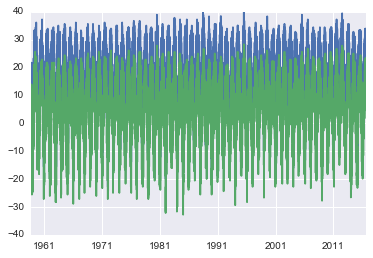

In [19]:
pp.plot(city_tmax['date'],city_tmax['value'])
pp.plot(city_tmin['date'],city_tmin['value'])

In [20]:
def fillnans(data):
    dates_float = data['date'].astype(np.float64)
    
    nan = np.isnan(data['value'])
    
    data['value'][nan] = np.interp(dates_float[nan],dates_float[~nan],data['value'][~nan])

In [21]:
fillnans(city_tmin)
fillnans(city_tmax)

In [22]:
np.mean(city_tmin['value']), np.mean(city_tmax['value'])

(4.6311446695701575, 14.918273054345766)

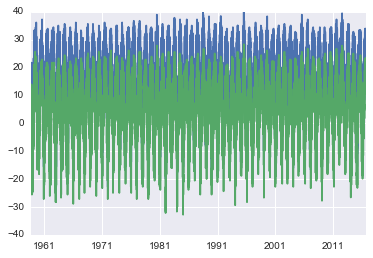

In [23]:
pp.plot(city_tmax['date'],city_tmax['value'])
pp.plot(city_tmin['date'],city_tmin['value'])

In [24]:
def plot_smoothed(t,win=10):
    smoothed = np.correlate(t['value'],np.ones(win)/win,'same')
    
    pp.plot(t['date'],smoothed)

In [25]:
def selectyear(data,year):
    start = np.datetime64('{}'.format(year))
    end = start + np.timedelta64(1,'Y')
    
    return data[(data['date'] >= start) & (data['date'] < end)]['value']

(712588.0, 734503.0, -10, 30)

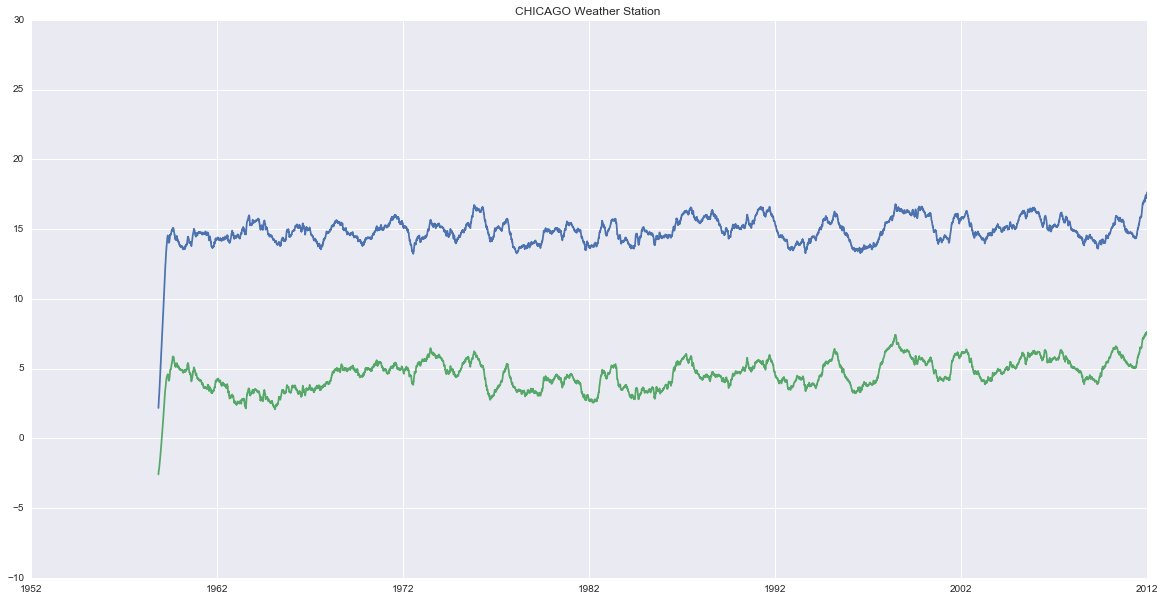

In [26]:
pp.figure(figsize=(20,10))

plot_smoothed(getobs(selectedStationCode + '.dly','TMAX'),365)
plot_smoothed(getobs(selectedStationCode + '.dly','TMIN'),365)

#NEED TO GET THE FUNCTION TO RETURN WHATEVER CITY IS INPUTTED'S MINIMUM YEAR FOR VALUES
pp.title(selectedStation + " Weather Station ")
pp.axis(xmin=np.datetime64('1952'),xmax=np.datetime64('2012'),ymin=-10,ymax=30)



In [27]:
def selectyear(data,year):
    start = np.datetime64('{}'.format(year))
    end = start + np.timedelta64(1,'Y')
    
    return data[(data['date'] >= start) & (data['date'] < end)]['value']

In [28]:
selectyear(city_tmax,1959).shape
[selectyear(city_tmax,year).shape[:365] for year in range(1959,2015+1)]

[(365,),
 (366,),
 (365,),
 (365,),
 (365,),
 (366,),
 (365,),
 (365,),
 (365,),
 (366,),
 (365,),
 (365,),
 (365,),
 (366,),
 (365,),
 (365,),
 (365,),
 (366,),
 (365,),
 (365,),
 (365,),
 (366,),
 (365,),
 (365,),
 (365,),
 (366,),
 (365,),
 (365,),
 (365,),
 (366,),
 (365,),
 (365,),
 (365,),
 (366,),
 (365,),
 (365,),
 (365,),
 (366,),
 (365,),
 (365,),
 (365,),
 (366,),
 (365,),
 (365,),
 (365,),
 (366,),
 (365,),
 (365,),
 (365,),
 (366,),
 (365,),
 (365,),
 (365,),
 (366,),
 (365,),
 (365,),
 (365,)]

In [29]:
city_tmax

array([(datetime.date(1958, 11, 1), 12.2),
       (datetime.date(1958, 11, 2), 11.7),
       (datetime.date(1958, 11, 3), 15.6), ...,
       (datetime.date(2016, 8, 29), 27.2),
       (datetime.date(2016, 8, 30), 27.2),
       (datetime.date(2016, 8, 31), 27.2)], 
      dtype=[('date', '<M8[D]'), ('value', '<f8')])

In [30]:
years = np.arange(1959,2015+1)
city_tmax_all = np.vstack([selectyear(city_tmax,year)[:365] for year in range(1959,2015+1)])
city_tmin_all = np.vstack([selectyear(city_tmin,year)[:365] for year in range(1959,2015+1)])

In [31]:
city_tmax_all.shape

(57, 365)

In [32]:
city_tmin_recordmin = np.min(city_tmin_all,axis=0)
city_tmin_recordmax = np.max(city_tmin_all,axis=0)
city_tmax_recordmin = np.min(city_tmax_all,axis=0)
city_tmax_recordmax = np.max(city_tmax_all,axis=0)

city_mean_maxes = np.mean(city_tmax_all,axis=1)
city_mean_mins = np.mean(city_tmin_all,axis=1)


city_warmest_recordWarm = years[np.argmax(city_mean_maxes)]
city_coldest_recordWarm = years[np.argmin(city_mean_maxes)]
city_warmest_recordLow = years[np.argmax(city_mean_mins)]
city_coldest_recordLow = years[np.argmin(city_mean_mins)]


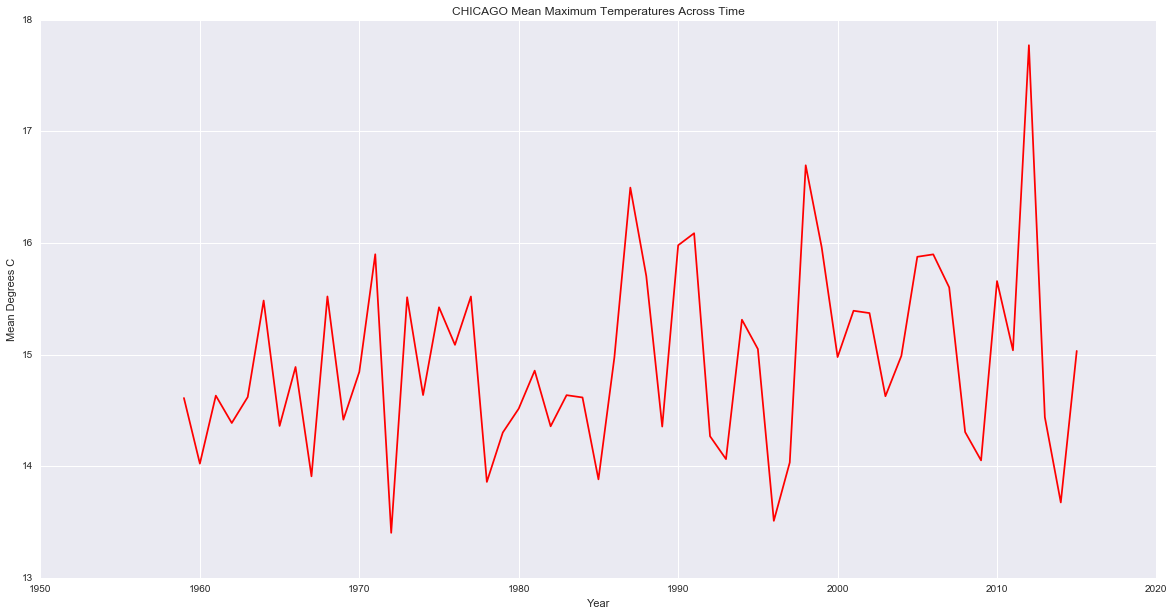

In [36]:
pp.figure(figsize=(20,10))
pp.plot(years,city_mean_maxes,color='r')
pp.title(selectedStation + ' Mean Maximum Temperatures Across Time')
pp.ylabel('Mean Degrees C')
pp.xlabel('Year')
pp.savefig(selectedStation + "MEANMAXTEMPS")

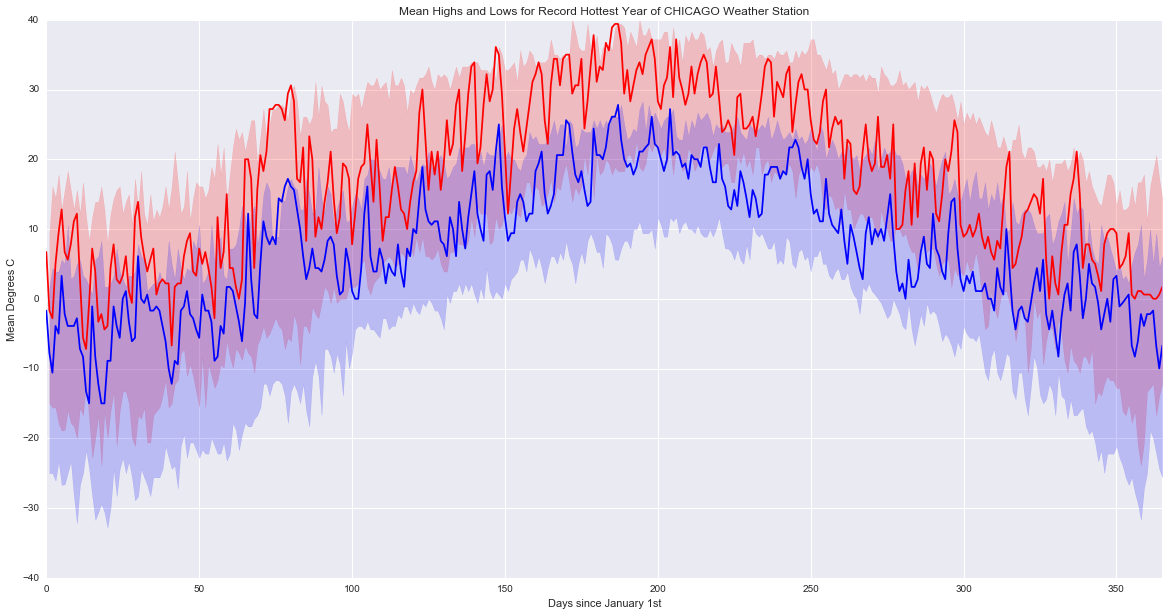

In [37]:
pp.figure(figsize = (20,10))
days = np.arange(1,365 + 1)
pp.fill_between(days,np.min(city_tmax_all,axis=0),np.max(city_tmax_all,axis=0),color='r', alpha=0.2)
pp.plot(selectyear(city_tmax,2012),color='r')
pp.fill_between(days,np.min(city_tmin_all,axis=0),np.max(city_tmin_all,axis=0),color='b',alpha=0.2)
pp.plot(selectyear(city_tmin,2012),color='b')
pp.axis(xmax=365)
pp.title("Mean Highs and Lows for Record Hottest Year of " + selectedStation + " Weather Station")
pp.xlabel("Days since January 1st")
pp.ylabel("Mean Degrees C")
pp.savefig(selectedStation + "HOTTESTYEAR")


